# 課題2 音響効果の付与
エコー，ピッチシフト，テンポシフトを時間領域および周波数領域で実現する


## 必要なライブラリのインポートおよび雑多な変数の設定
おまじない

In [14]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal
import os


eps = 1e-10     ### 「めっちゃ小さい数」として使う便利な値
plt.rcParams.update({
    ####### matplotlibでグラフを出力するときの設定
    'font.size' : 18,     ### フォントサイズ
    'font.family': ['Times New Roman']   ### フォントの種類
})
duration = 10   ### この課題で扱う曲の長さ[sec.]
fft_num = 2048  ### FFT長(librosaのSTFTでのFFTを行う1サンプルのデフォルト値)

## WAVファイルから波形の読み込み
input_fileは読み込みたいファイルに合わせて適宜変更

In [8]:
####### 読み込むファイル名(適宜変更)
input_file = "wav_data" + os.sep + "input" + os.sep + "sakura.wav"

####### 書き出し先のディレクトリ
output_dir = "wav_data" + os.sep + "output" + os.sep


wave, sr = librosa.core.load(input_file)  ### load input wav

####### waveをdurationの長さ分だけ取り出す
wave_length = duration*sr
wave = wave[:wave_length]

print(f"waveのサイズ:{wave.shape}\n時間:{duration} sec\nサンプリングレート{sr}")

waveのサイズ:(220500,)
時間:10 sec
サンプリングレート22050


## 課題2.1 時間領域でエコーをかける

### matplotlibで波形の表示

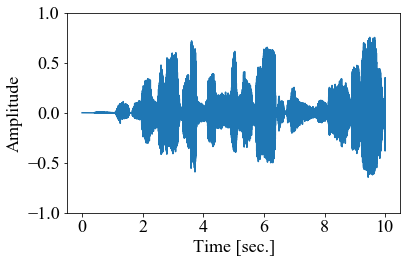

In [9]:
t = np.arange(0, wave.shape[0]/sr, 1/sr)  ### x axis [sec.]
plt.plot(t, wave)           ### x軸: t, y軸: wave
plt.xlabel("Time [sec.]")   ### x軸ラベル
plt.ylabel("Amplitude")     ### y軸ラベル
plt.ylim([-1, 1])           ### y軸表示範囲
plt.tight_layout()          ### 図のサイズをなんかいい感じにする
plt.show()                  ### グラフの表示

In [ ]:
waveにエコーをかけたwave_echo1の作成

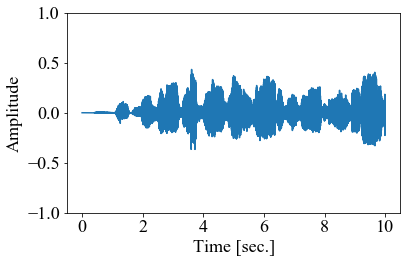

In [26]:
####### waveと同じ中身のnumpy配列を作成
wave_echo1 = wave.copy()
delay = 1.5     ### エコーの遅れる長さ(秒)
delay_pow = 0.7             ### エコーの音量の倍率


####### WRITE HERE ######################################################
###### delay秒遅れるとしたときのサンプル数
###### int型にキャストすること
delay_length = int(delay*sr)

####### waveのdelay_length後から最後までのデータに対して，
####### delay_length個分前の音を加える
for i in range(delay_length, wave_length):
    wave_echo1[i] += delay_pow*wave[i-delay_length]
    wave_echo1[i] *= 0.5    ### 音割れ防止のための調整

#########################################################################

t = np.arange(0, wave_echo1.shape[0]/sr, 1/sr)  ### x axis [sec.]
plt.plot(t, wave_echo1)           ### x軸: t, y軸: wave
plt.xlabel("Time [sec.]")   ### x軸ラベル
plt.ylabel("Amplitude")     ### y軸ラベル
plt.ylim([-1, 1])           ### y軸表示範囲
plt.tight_layout()          ### 図のサイズをなんかいい感じにする
plt.show()                  ### グラフの表示

####### wave_echo1をout2_echo1.wavとして保存
sf.write(output_dir + os.sep + "out2_echo1.wav", wave_echo1, sr)

## 課題2.2 周波数領域でエコーをかける

### STFTとカラーマップの表示

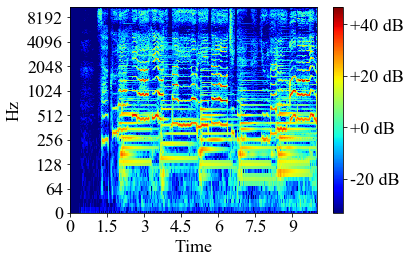

STFT後のサイズ:縦1025，横431


In [27]:
x = librosa.core.stft(wave, n_fft=fft_num, hop_length=fft_num//4)  ### STFT

####### カラーマップの描画
x_abs = np.abs(x)  ### 振幅成分の取り出し
x_abs_db = librosa.core.amplitude_to_db(x_abs)  ### db単位へ変換
librosa.display.specshow(x_abs_db, cmap='jet', sr=sr, x_axis='time', y_axis='log')  ### スペクトログラムを表示(y軸を対数軸に変換)
plt.colorbar(format='%+2.0f dB')    ### カラーバーの表示
plt.tight_layout()                  ### 図のサイズをなんかいい感じにする
plt.show()                          ### グラフの表示

print(f"STFT後のサイズ:縦{x.shape[0]}，横{x.shape[1]}")

### xにエコーをかけたx_echoの作成

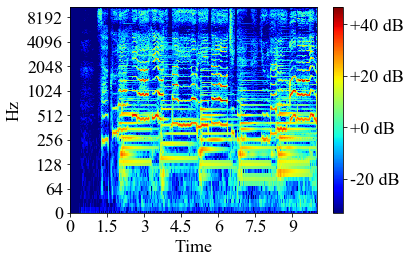

In [28]:
####### xと同じ中身のnumpy行列を作成
x_echo = x.copy()

sample_per_sec = x_echo.shape[1]//duration  ### STFTカラーマップの1秒当たりのサンプル数
delay_pow = 0.7             ### エコーの音量の倍率

####### WRITE HERE ######################################################
###### delay秒遅れるとしたときのサンプル数
###### int型にキャストすること
delay_length = int(delay*sample_per_sec)

####### xのdelay_length後から最後までに対して，
####### delay_length個分前の値を加える
for j in range(delay_length, x.shape[1]):
    for i in range(x.shape[0]):
        x_echo[i, j] += delay_pow*x[i, j-delay_length]

#########################################################################

####### カラーマップの描画
x_abs = np.abs(x)  ### 振幅成分の取り出し
x_abs_db = librosa.core.amplitude_to_db(x_abs)  ### db単位へ変換
librosa.display.specshow(x_abs_db, cmap='jet', sr=sr, x_axis='time', y_axis='log')  ### スペクトログラムを表示(y軸を対数軸に変換)
plt.colorbar(format='%+2.0f dB')    ### カラーバーの表示
plt.tight_layout()                  ### 図のサイズをなんかいい感じにする
plt.show()                          ### グラフの表示

### x_echoをiSTFTにより波形成分に変換

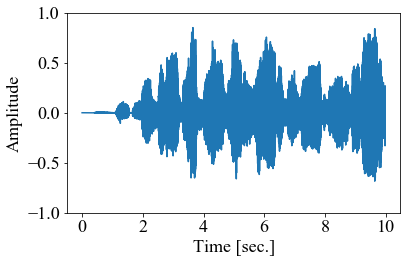

In [29]:
####### iSTFTにより波形に戻す
wave_echo2 = librosa.core.istft(x_echo)

####### wave3の表示
t = np.arange(0, wave_echo2.shape[0]/sr, 1/sr)  ## x axis [sec.]
plt.plot(t, wave_echo2)
plt.xlabel("Time [sec.]")
plt.ylabel("Amplitude")
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

####### wave_echo2をout2_echo2.wavとして保存
sf.write(output_dir + os.sep + "out2_echo2.wav", wave_echo2, sr)